# Analyzing Police Activity

### Imports

In [1]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read data

ri = pd.read_csv('police.csv')
weather = pd.read_csv('weather.csv')

### Cleaning

In [3]:
print(ri.head())

  state   stop_date stop_time  county_name driver_gender driver_race  \
0    RI  2005-01-04     12:55          NaN             M       White   
1    RI  2005-01-23     23:15          NaN             M       White   
2    RI  2005-02-17     04:15          NaN             M       White   
3    RI  2005-02-20     17:15          NaN             M       White   
4    RI  2005-02-24     01:20          NaN             F       White   

                    violation_raw  violation  search_conducted search_type  \
0  Equipment/Inspection Violation  Equipment             False         NaN   
1                        Speeding   Speeding             False         NaN   
2                        Speeding   Speeding             False         NaN   
3                Call for Service      Other             False         NaN   
4                        Speeding   Speeding             False         NaN   

    stop_outcome is_arrested stop_duration  drugs_related_stop district  
0       Citation       F

In [4]:
# count the number of missing values by column
print(ri.isnull().sum())

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64


In [5]:
# examine the shape of the df
print(ri.shape)

(91741, 15)


In [6]:
# drop the 'county_name' and 'state' columns
ri.drop(['county_name','state'], axis='columns', inplace=True)

# examine the updated shape of the df, confirming the loss of two columns
print(ri.shape)

(91741, 13)


In [7]:
# count the number of missing values by column
print(ri.isnull().sum())

stop_date                 0
stop_time                 0
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64


In [8]:
# drop all rows that are missing a value in the 'driver_gender' column
ri.dropna(subset=['driver_gender'], inplace=True)

# count the number of missing values by column, confirming 'driver_gender' has none
print(ri.isnull().sum())

stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64


In [9]:
# examine the shape of the df
print(ri.shape)

(86536, 13)


In [10]:
# examine the dtypes of the df
print(ri.dtypes)

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object


In [12]:
# examine the first five rows of the 'is_arrested' column
print(ri['is_arrested'].head())

0    False
1    False
2    False
3     True
4    False
Name: is_arrested, dtype: object


In [15]:
# convert the dtype of 'is_arrested' to bool
ri['is_arrested'] = ri['is_arrested'].astype('bool')

# verify that the dtype of 'is_arrested' is now bool
print(ri['is_arrested'].dtype)

bool


In [16]:
# concat 'stop_date' and 'stop_time' with a space
combined = ri['stop_date'].str.cat(ri['stop_time'], sep=' ')

# convert the dtype of 'combined' to datetime
ri['stop_datetime'] = pd.to_datetime(combined)

# verify that the dtype of 'stop_datetime' is datetime
print(ri['stop_datetime'].dtype)

datetime64[ns]


In [17]:
# set the index to the 'stop_datetime' column
ri.set_index('stop_datetime', inplace=True)

# examine the index
print(ri.index)

DatetimeIndex(['2005-01-04 12:55:00', '2005-01-23 23:15:00',
               '2005-02-17 04:15:00', '2005-02-20 17:15:00',
               '2005-02-24 01:20:00', '2005-03-14 10:00:00',
               '2005-03-29 21:55:00', '2005-04-04 21:25:00',
               '2005-07-14 11:20:00', '2005-07-14 19:55:00',
               ...
               '2015-12-31 13:23:00', '2015-12-31 18:59:00',
               '2015-12-31 19:13:00', '2015-12-31 20:20:00',
               '2015-12-31 20:50:00', '2015-12-31 21:21:00',
               '2015-12-31 21:59:00', '2015-12-31 22:04:00',
               '2015-12-31 22:09:00', '2015-12-31 22:47:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=86536, freq=None)


In [18]:
# examine the columns, confiming that 'stop_datetime' no longer appears here
print(ri.columns)

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
       'district'],
      dtype='object')


### Analysis
#### Q: Do the genders commit different violations?

In [19]:
# count the unique values in 'violation'
print(ri['violation'].value_counts())

Speeding               48423
Moving violation       16224
Equipment              10921
Other                   4409
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64


In [20]:
# express the counts proportionally
print(ri['violation'].value_counts(normalize=True))

Speeding               0.559571
Moving violation       0.187483
Equipment              0.126202
Other                  0.050950
Registration/plates    0.042791
Seat belt              0.033004
Name: violation, dtype: float64


In [21]:
# create a df of female drivers
female = ri[ri['driver_gender'] == 'F']

# create a df of male drivers
male = ri[ri['driver_gender'] == 'M']

# calc the violations by female drivers proportionally
print(female['violation'].value_counts(normalize=True))

Speeding               0.658114
Moving violation       0.138218
Equipment              0.105199
Registration/plates    0.044418
Other                  0.029738
Seat belt              0.024312
Name: violation, dtype: float64


In [22]:
# calc the violations by male drivers proportionally
print(male['violation'].value_counts(normalize=True))

Speeding               0.522243
Moving violation       0.206144
Equipment              0.134158
Other                  0.058985
Registration/plates    0.042175
Seat belt              0.036296
Name: violation, dtype: float64


#### O: About 2/3 female traffic stops are for speeding, whereas stops of males are more valanced amoung the six categories.
####    Need to take into account the number of stops, number of drivers

#### Q: Does gender affect who gets a speeding ticket?
####    Keep in mind: we can't determine causation here, only an observational pattern

In [23]:
# create a df of females who were stopped for speeding
female_and_speeding = ri[(ri['driver_gender'] == 'F') & (ri['violation'] == 'Speeding')]

# create a df of males who were stopped for speeding
male_and_speeding = ri[(ri['driver_gender'] == 'M') & (ri['violation'] == 'Speeding')]

# calc the stop outcomes for female drivers proportionally
print(female_and_speeding['stop_outcome'].value_counts(normalize=True))

Citation            0.952192
Warning             0.040074
Arrest Driver       0.005752
N/D                 0.000959
Arrest Passenger    0.000639
No Action           0.000383
Name: stop_outcome, dtype: float64


In [24]:
# calc the stop outcomes for male drivers proportionally
print(male_and_speeding['stop_outcome'].value_counts(normalize=True))

Citation            0.944595
Warning             0.036184
Arrest Driver       0.015895
Arrest Passenger    0.001281
No Action           0.001068
N/D                 0.000976
Name: stop_outcome, dtype: float64


#### O: The figures are nearly identical for men and women.

#### Q: Does gender affect whose vehicle is searched?

In [25]:
# examine the dtype of 'search_conducted'
print(ri['search_conducted'].dtype)

bool


In [26]:
# calc the search rate by counting the values
print(ri['search_conducted'].value_counts(normalize=True))

False    0.961785
True     0.038215
Name: search_conducted, dtype: float64


In [27]:
# calc the search rate by taking the mean
print(ri['search_conducted'].mean())

0.0382153092354627


In [28]:
# calc the search rate for female drivers
print(ri[ri['driver_gender'] == 'F']['search_conducted'].mean())

0.019180617481282074


In [29]:
# calc the search rate for male drivers
print(ri[ri['driver_gender'] == 'M']['search_conducted'].mean())

0.04542557598546892


In [30]:
# calc the search rate for both groups
print(ri.groupby('driver_gender')['search_conducted'].mean())

driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64


#### O: Male drivers are searched more than 2x that of female drivers.
####    What's going on here?

In [31]:
# calc the search rate for the combination of gender and violation
print(ri.groupby(['driver_gender','violation'])['search_conducted'].mean())

driver_gender  violation          
F              Equipment              0.039984
               Moving violation       0.039257
               Other                  0.041018
               Registration/plates    0.054924
               Seat belt              0.017301
               Speeding               0.008309
M              Equipment              0.071496
               Moving violation       0.061524
               Other                  0.046191
               Registration/plates    0.108802
               Seat belt              0.035119
               Speeding               0.027885
Name: search_conducted, dtype: float64


In [32]:
# in reverse order
print(ri.groupby(['violation','driver_gender'])['search_conducted'].mean())

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64


#### O: For all types of violations, the search rate is higher for men than women.

#### Q: Does gender affect who is frisked during a search?

In [33]:
# count the 'search_type' values
print(ri['search_type'].value_counts())

Incident to Arrest                                          1290
Probable Cause                                               924
Inventory                                                    219
Reasonable Suspicion                                         214
Protective Frisk                                             164
Incident to Arrest,Inventory                                 123
Incident to Arrest,Probable Cause                            100
Probable Cause,Reasonable Suspicion                           54
Incident to Arrest,Inventory,Probable Cause                   35
Probable Cause,Protective Frisk                               35
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      25
Protective Frisk,Reasonable Suspicion                         19
Incident to Arrest,Inventory,Protective Frisk                 18
Incident to Arrest,Probable Cause,Protective Frisk            13
Inventory,Protective Fris

In [34]:
# create new col with bool 'frisk' identifying where 'search_type' contains the string "Protective Frisk"
ri['frisk'] = ri['search_type'].str.contains('Protective Frisk', na=False)

# verify the dtype of 'frisk'
print(ri['frisk'].dtype)

bool


In [35]:
# take the sum of 'frisk'
print(ri['frisk'].sum())

303


In [36]:
# create a df of stops in which a search was conducted
searched = ri[ri['search_conducted'] == True]

# calc the overall frisk rate by taking the mean of 'frisk'
print(searched['frisk'].mean())

0.09162382824312065


In [37]:
# calc the frisk rate for each gender
print(searched.groupby('driver_gender')['frisk'].mean())

driver_gender
F    0.074561
M    0.094353
Name: frisk, dtype: float64


#### O: The frisk rate is higher for men than for women.
####    However, we cannot conclude that this disparity is caused by the driver's gender

#### Q: Does time of day affect arrest rate?

In [38]:
# calc the overall arrest rate
print(ri['is_arrested'].mean())

0.0355690117407784


In [39]:
# calc the hourly arrest rate
print(ri.groupby(ri.index.hour)['is_arrested'].mean())

stop_datetime
0     0.051431
1     0.064932
2     0.060798
3     0.060549
4     0.048000
5     0.042781
6     0.013813
7     0.013032
8     0.021854
9     0.025206
10    0.028213
11    0.028897
12    0.037399
13    0.030776
14    0.030605
15    0.030679
16    0.035281
17    0.040619
18    0.038204
19    0.032245
20    0.038107
21    0.064541
22    0.048666
23    0.047592
Name: is_arrested, dtype: float64


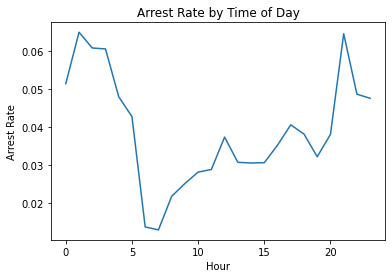

In [40]:
# save this as its own object
hourly_arrest_rate = ri.groupby(ri.index.hour)['is_arrested'].mean()

# create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot(kind='line')

# add labels
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# display the plot
plt.show()

#### O: The arrest rate has a significant spike overnight, and then dips in the early morning hours.

#### Q: Are drug-related stops on the rise?

In [41]:
# calc the annual rate of drug-related stops
print(ri['drugs_related_stop'].resample('A').mean())

stop_datetime
2005-12-31    0.006501
2006-12-31    0.007258
2007-12-31    0.007970
2008-12-31    0.007505
2009-12-31    0.009889
2010-12-31    0.010081
2011-12-31    0.009731
2012-12-31    0.009921
2013-12-31    0.013094
2014-12-31    0.013826
2015-12-31    0.012266
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


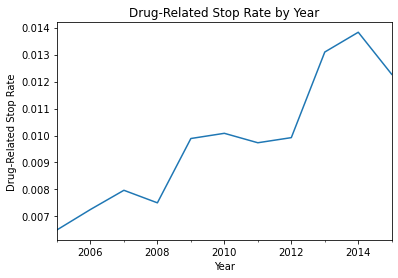

In [42]:
# save this as its own object
annual_drug_rate = ri['drugs_related_stop'].resample('A').mean()

# create a line plot of 'annual_drug_rate'
annual_drug_rate.plot(kind='line')

# add labels
plt.xlabel('Year')
plt.ylabel('Drug-Related Stop Rate')
plt.title('Drug-Related Stop Rate by Year')

# display the plot
plt.show()

#### O: The rate of drug-related stops nearly doubled over the course of 10 years.
####    What's going on here?

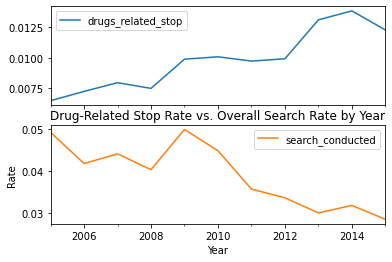

In [44]:
# calc and save the annual search rate
annual_search_rate = ri['search_conducted'].resample('A').mean()

# concat 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')

# create subplots from 'annual'
annual.plot(subplots=True)

# add labels
plt.xlabel('Year')
plt.ylabel('Rate')
plt.title('Drug-Related Stop Rate vs. Overall Search Rate by Year')

# display the subplots
plt.show()

#### O: Interesting! The rate of drug-related stops has increased even though the search rate has decreased.

#### Q: What violations are caught in each district?

In [45]:
# create a frequency table of districts and violations
print(pd.crosstab(ri['district'], ri['violation']))

violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1          672              1254    290                  120          0   
Zone K2         2061              2962    942                  768        481   
Zone K3         2302              2898    705                  695        638   
Zone X1          296               671    143                   38         74   
Zone X3         2049              3086    769                  671        820   
Zone X4         3541              5353   1560                 1411        843   

violation  Speeding  
district             
Zone K1        5960  
Zone K2       10448  
Zone K3       12322  
Zone X1        1119  
Zone X3        8779  
Zone X4        9795  


In [46]:
# save this as its own object
all_zones = pd.crosstab(ri['district'], ri['violation'])

# select rows "Zone K1" through "Zone K3"
print(all_zones.loc['Zone K1':'Zone K3'])

violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1          672              1254    290                  120          0   
Zone K2         2061              2962    942                  768        481   
Zone K3         2302              2898    705                  695        638   

violation  Speeding  
district             
Zone K1        5960  
Zone K2       10448  
Zone K3       12322  


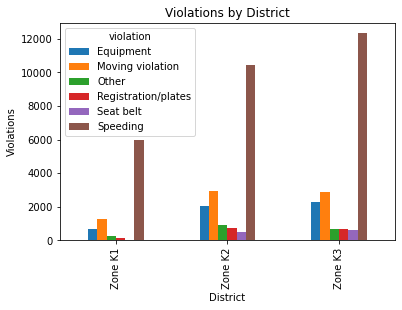

In [47]:
# save this as its own object
k_zones = all_zones.loc['Zone K1':'Zone K3']

# create a bar plot of 'k_zones'
k_zones.plot(kind='bar')

# add labels
plt.xlabel('District')
plt.ylabel('Violations')
plt.title('Violations by District')

# display the plot
plt.show()

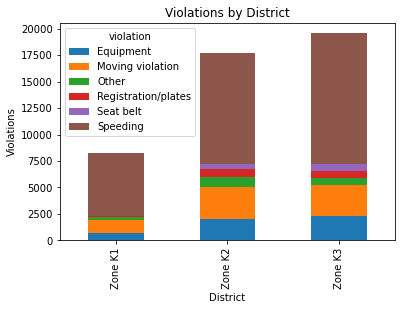

In [48]:
# create a stacked bar plot of 'k_zones'
k_zones.plot(kind='bar', stacked=True)

# add labels
plt.xlabel('District')
plt.ylabel('Violations')
plt.title('Violations by District')

# display the plot
plt.show()

#### O: The vast majority of traffic stops in Zone K1 are for speeding, and Zones K2 & K3 are very similar to each other.

#### Q: How long might you be stopped for a violation?

In [49]:
# print the unique values in 'stop_duration'
print(ri['stop_duration'].unique())

['0-15 Min' '16-30 Min' '30+ Min']


In [50]:
# create a dict that maps str to int
mapping = {'0-15 Min': 8, '16-30 Min': 23, '30+ Min': 45}

# convert the 'stop_duration' strings to ints using the mapping
ri['stop_minutes'] = ri['stop_duration'].map(mapping)

# print the unique values in 'stop_minutes'
print(ri['stop_minutes'].unique())

[ 8 23 45]


In [51]:
# calc the mean 'stop_minutes' for each value in 'violation_raw'
print(ri.groupby('violation_raw')['stop_minutes'].mean())

violation_raw
APB                                 17.967033
Call for Service                    22.124371
Equipment/Inspection Violation      11.445655
Motorist Assist/Courtesy            17.741463
Other Traffic Violation             13.844490
Registration Violation              13.736970
Seatbelt Violation                   9.662815
Special Detail/Directed Patrol      15.123632
Speeding                            10.581562
Suspicious Person                   14.910714
Violation of City/Town Ordinance    13.254144
Warrant                             24.055556
Name: stop_minutes, dtype: float64


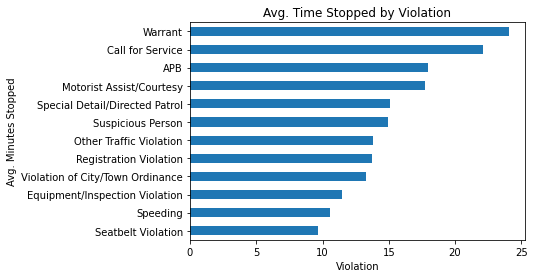

In [52]:
# save this as its own object
stop_length = ri.groupby('violation_raw')['stop_minutes'].mean()

# sort 'stop_length' and create a horizontal bar plot
stop_length.sort_values().plot(kind='barh')

# add labels
plt.xlabel('Violation')
plt.ylabel('Avg. Minutes Stopped')
plt.title('Avg. Time Stopped by Violation')

# display the plot
plt.show()

#### O: You would likely spend the most time stopped if there's a warrant out for your arrest, and the least time for a seatbelt violation.
####    These results are intuitive, no real surprises

#### Q: How does weather impact police activity regarding traffic stops?

### Prep

In [53]:
# describe the temperature columns
print(weather[['TMIN','TAVG','TMAX']].describe())

              TMIN         TAVG         TMAX
count  4017.000000  1217.000000  4017.000000
mean     43.484441    52.493016    61.268608
std      17.020298    17.830714    18.199517
min      -5.000000     6.000000    15.000000
25%      30.000000    39.000000    47.000000
50%      44.000000    54.000000    62.000000
75%      58.000000    68.000000    77.000000
max      77.000000    86.000000   102.000000


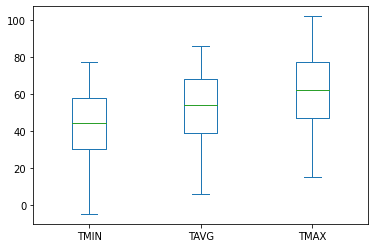

In [54]:
# create a box plot of the temperature columns
weather[['TMIN','TAVG','TMAX']].plot(kind='box')

# display the plot
plt.show()

In [55]:
# create a 'TDIFF' col that represents temperature difference
weather['TDIFF'] = weather['TMAX'] - weather['TMIN']

# describe the 'TDIFF' column
print(weather['TDIFF'].describe())

count    4017.000000
mean       17.784167
std         6.350720
min         2.000000
25%        14.000000
50%        18.000000
75%        22.000000
max        43.000000
Name: TDIFF, dtype: float64


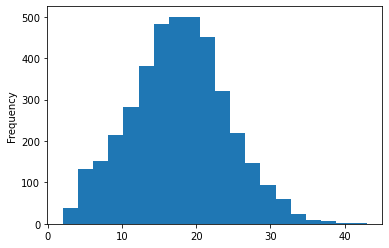

In [56]:
# create a histogram with 20 bins that visualizes 'TDIFF'
weather['TDIFF'].plot(kind='hist', bins=20)

# display the plot
plt.show()

#### O: 'TDIFF' has no negative values and the distribution is approximately normal.

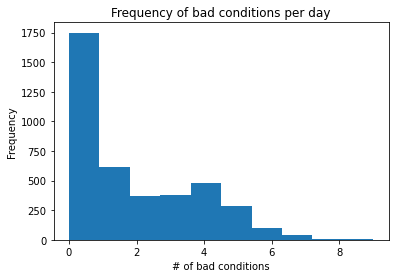

In [58]:
# copy 'WT01' through 'WT22' into a new df
WT = weather.loc[:, 'WT01':'WT22']

# calc the sum of each row in WT
weather['bad_conditions'] = WT.sum(axis='columns')

# replace na values in 'bad_conditions' with 0
weather['bad_conditions'] = weather['bad_conditions'].fillna(0).astype('int')

# create a histograph that visualized 'bad_conditions'
weather['bad_conditions'].plot(kind='hist')

# add labels
plt.xlabel('# of bad conditions')
# plt.ylabel('Violations')
plt.title('Frequency of bad conditions per day')

# display the plot
plt.show()

#### O: Many days had no bad conditions, and onyl a small proportion had more than four bad conditions.

In [59]:
# count the unique values in 'bad_conditions' and sort the index
print(weather.bad_conditions.value_counts().sort_index())

0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64


In [60]:
# create a dict that maps ints to strs
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad', 4:'bad', 5:'worse', 6:'worse', 7:'worse', 8:'worse', 9:'worse'}

# convert the 'bad_conditions' ints to strings using the 'mapping'
weather['rating'] = weather.bad_conditions.map(mapping)

# count the unique values in 'rating'
print(weather['rating'].value_counts())

bad      1836
good     1749
worse     432
Name: rating, dtype: int64


In [61]:
# specify the logical order of the weather ratings
cats = pd.CategoricalDtype(['good','bad','worse'], ordered=True)

# change the dtype of 'rating' to category
weather['rating'] = weather['rating'].astype(cats)

# examine the first five rows of 'rating'
print(weather['rating'].head())

0    bad
1    bad
2    bad
3    bad
4    bad
Name: rating, dtype: category
Categories (3, object): ['good' < 'bad' < 'worse']


In [62]:
# reset the index of ri
ri.reset_index(drop=False, inplace=True)

# examine the head of ri
print(ri.head())

        stop_datetime   stop_date stop_time driver_gender driver_race  \
0 2005-01-04 12:55:00  2005-01-04     12:55             M       White   
1 2005-01-23 23:15:00  2005-01-23     23:15             M       White   
2 2005-02-17 04:15:00  2005-02-17     04:15             M       White   
3 2005-02-20 17:15:00  2005-02-20     17:15             M       White   
4 2005-02-24 01:20:00  2005-02-24     01:20             F       White   

                    violation_raw  violation  search_conducted search_type  \
0  Equipment/Inspection Violation  Equipment             False         NaN   
1                        Speeding   Speeding             False         NaN   
2                        Speeding   Speeding             False         NaN   
3                Call for Service      Other             False         NaN   
4                        Speeding   Speeding             False         NaN   

    stop_outcome  is_arrested stop_duration  drugs_related_stop district  \
0       Citation

In [63]:
# create a df from the 'DATE' and 'rating' cols
weather_rating = pd.DataFrame(weather[['DATE','rating']])

# examine the head of weather_rating
print(weather_rating.head())

         DATE rating
0  2005-01-01    bad
1  2005-01-02    bad
2  2005-01-03    bad
3  2005-01-04    bad
4  2005-01-05    bad


In [64]:
# examine the shape of ri
print(ri.shape)

(86536, 16)


In [65]:
# merge ri and weather_rating on a left join
ri_weather = pd.merge(left=ri, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')

# examine the shape of ri_weather
print(ri_weather.shape)

(86536, 18)


In [66]:
# set 'stop_datetime' as the index of ri_weather
ri_weather.set_index('stop_datetime', inplace=True)

print(ri_weather.head())

                      stop_date stop_time driver_gender driver_race  \
stop_datetime                                                         
2005-01-04 12:55:00  2005-01-04     12:55             M       White   
2005-01-23 23:15:00  2005-01-23     23:15             M       White   
2005-02-17 04:15:00  2005-02-17     04:15             M       White   
2005-02-20 17:15:00  2005-02-20     17:15             M       White   
2005-02-24 01:20:00  2005-02-24     01:20             F       White   

                                      violation_raw  violation  \
stop_datetime                                                    
2005-01-04 12:55:00  Equipment/Inspection Violation  Equipment   
2005-01-23 23:15:00                        Speeding   Speeding   
2005-02-17 04:15:00                        Speeding   Speeding   
2005-02-20 17:15:00                Call for Service      Other   
2005-02-24 01:20:00                        Speeding   Speeding   

                     search_conducted s

### Analysis

In [67]:
# calc the overall arrest rate
print(ri_weather['is_arrested'].mean())

0.0355690117407784


In [68]:
# calc the arrest rate for each 'rating'
print(ri_weather.groupby('rating')['is_arrested'].mean())

rating
good     0.033715
bad      0.036261
worse    0.041667
Name: is_arrested, dtype: float64


In [69]:
# calc the arrest rate for each 'violation' and 'rating'
print(ri_weather.groupby(['violation','rating'])['is_arrested'].mean())

violation            rating
Equipment            good      0.059007
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076966
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013405
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64


#### O: Interesting! The arrest rate increases as weather gets worse, which can be seen across many violation types.

In [70]:
# save the arrest rate for each violation and rating into its own object
arrest_rate = ri_weather.groupby(['violation','rating'])['is_arrested'].mean()

# print the arrest_rate series
print(arrest_rate)

violation            rating
Equipment            good      0.059007
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076966
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013405
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64


In [71]:
# print the arrest rate for moving violations in bad weather
print(arrest_rate.loc['Moving violation', 'bad'])

0.05804964058049641


In [72]:
# print the arrest rates for speeding violations in all weather conditions
print(arrest_rate.loc['Speeding', :])

rating
good     0.013405
bad      0.013314
worse    0.016886
Name: is_arrested, dtype: float64


In [73]:
# unstack the arrest_rate series into a df
print(arrest_rate.unstack())

rating                   good       bad     worse
violation                                        
Equipment            0.059007  0.066311  0.097357
Moving violation     0.056227  0.058050  0.065860
Other                0.076966  0.087443  0.062893
Registration/plates  0.081574  0.098160  0.115625
Seat belt            0.028587  0.022493  0.000000
Speeding             0.013405  0.013314  0.016886


In [74]:
# create the same df using a pivot table
print(ri_weather.pivot_table(index='violation', columns='rating', values='is_arrested'))

rating                   good       bad     worse
violation                                        
Equipment            0.059007  0.066311  0.097357
Moving violation     0.056227  0.058050  0.065860
Other                0.076966  0.087443  0.062893
Registration/plates  0.081574  0.098160  0.115625
Seat belt            0.028587  0.022493  0.000000
Speeding             0.013405  0.013314  0.016886


#### O: Seat belt violations are ZERO in 'worse' weather conditions!